# **Q1. Business Case: Yulu - Hypothesis Testing**

**About Yulu**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

**How you can help here?**

The company wants to know:

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
How well those variables describe the electric cycle demands
Dataset:

**Dataset Link:** [yulu_data.csv](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089)

**Column Profiling:**

- **datetime**: datetime  
- **season**: season (1: spring, 2: summer, 3: fall, 4: winter)  
- **holiday**: whether day is a holiday or not (extracted from https://dchr.dc.gov/page/holiday-schedule)  
- **workingday**: if day is neither weekend nor holiday is 1, otherwise is 0.  
- **weather**:
    - 1: Clear, Few clouds, partly cloudy, partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp**: temperature in Celsius
- **atemp**: feeling temperature in Celsius
- **humidity**: humidity
- **windspeed**: wind speed
- **casual**: count of casual users
- **registered**: count of registered users
- **count**: count of total rental bikes including both casual and registered

**Concept Used:**

- Bi-Variate Analysis
- 2-sample t-test: testing for difference across populations
- ANNOVA
- Chi-square


**Procedure:**
- Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset
- Try establishing a relation between the dependent and independent variable (Dependent “Count” & Independent: Workingday, Weather, Season etc)
- Select an appropriate test to check whether:
Working Day has effect on number of electric cycles rented
  - No. of cycles rented similar or different in different seasons
  - No. of cycles rented similar or different in different weather
  - Weather is dependent on season (check between 2 predictor variable)
- Set up Null Hypothesis (H0)
- State the alternate hypothesis (H1)
- Check assumptions of the test (Normality, Equal Variance). You can check it using Histogram, Q-Q plot or statistical methods like levene’s test, Shapiro-wilk test (optional)
  - Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test) but double check using visual analysis and report wherever necessary
- Set a significance level (alpha)
- Calculate test Statistics.
- Decision to accept or reject null hypothesis.
- Inference from the analysis

**Tasks:**
- Visual analysis
- Hypothesis formulation
- Select the appropriate test
- Check test assumptions
- Find the p-value
- Conclusion based on the p-value

## **Define the Problem Statement, Import the required Libraries and perform Exploratory Data Analysis.**

### **Accesing file libraries and Summarizing the actual data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [ ]:
# import warnings
# warnings.filterwarnings("ignore")

#### **Summary of the Dataset**

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089 -O yulu_data.csv

--2024-03-27 06:22:15--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.164.173.58, 18.164.173.110, 18.164.173.18, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.164.173.58|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [text/plain]
Saving to: ‘yulu_data.csv’

yulu_data.csv       100%[===================>] 633.16K  --.-KB/s    in 0.04s   

2024-03-27 06:22:15 (15.3 MB/s) - ‘yulu_data.csv’ saved [648353/648353]



In [ ]:
data1 = pd.read_csv('yulu_data.csv')
data1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### **a. Examine dataset structure, characteristics, and statistical summary.**

In [ ]:
data = data1.copy()
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
data.describe(include=['object'])

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
# Finding the number of row(s) and column(s) of the dataset
print(f'Shape of the dataset: {data.shape}')
print(f'Number of rows: {data.shape[0]}')
print(f'Number of columns: {data.shape[1]}')

Shape of the dataset: (10886, 12)
Number of rows: 10886
Number of columns: 12


### **b. Identify missing values and perform Imputation using an appropriate method.**

In [ ]:
# Ensuring the missing values from overall data
np.any(data.isna())

False

In [ ]:
# Ensuring the missing values by column wise
data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

### **c. Identify and remove duplicate records.**

In [ ]:
# Ensuring the duplicates in overall data
np.any(data.duplicated())

False

### **d. Analyze the distribution of Numerical & Categorical variables, separately**

##### ***i. For Numerical features use Histogram, Distplot, etc.***

In [ ]:
# column_title_hist = np.array(data.select_dtypes(exclude='object').columns)
column_title_hist = np.array(data.columns[5:])
column_title_hist = np.append(column_title_hist,['',''])
column_title_hist = np.array(column_title_hist).reshape(3, -1)
column_title_hist

array([['temp', 'atemp', 'humidity'],
       ['windspeed', 'casual', 'registered'],
       ['count', '', '']], dtype=object)

In [ ]:
Rows_hist = column_title_hist.shape[0]
Columns_hist = column_title_hist.shape[1]
print(f"Rows: {Rows_hist}; Columns: {Columns_hist}")

Rows: 3; Columns: 3


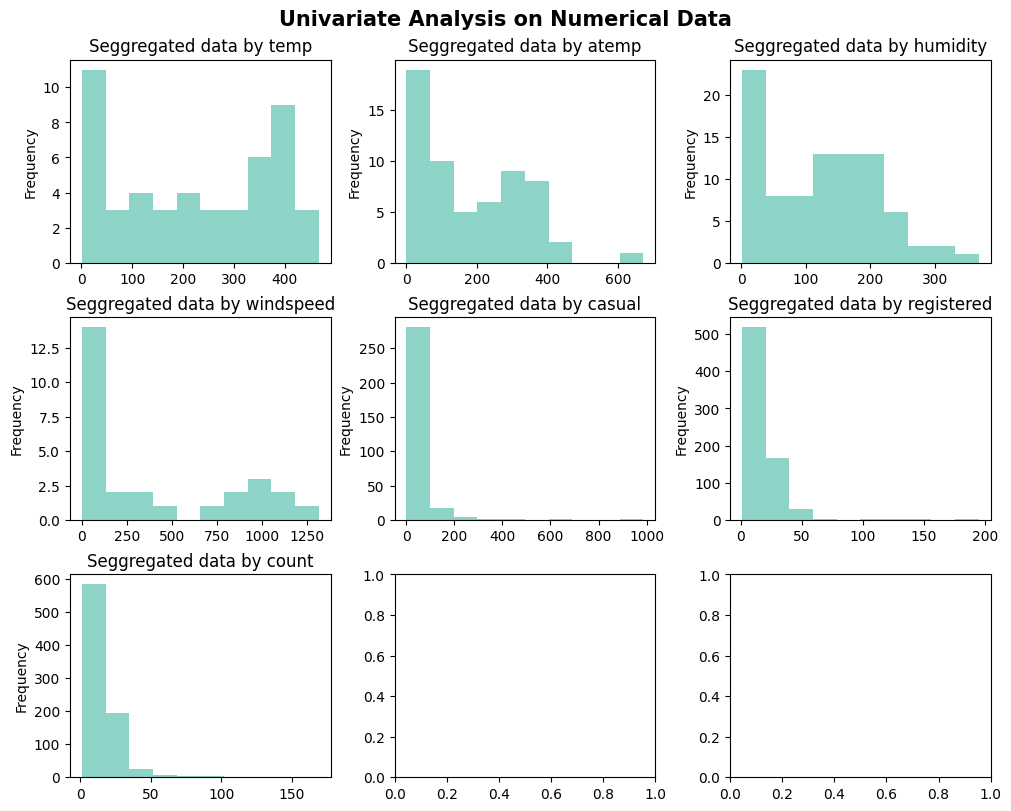

In [ ]:
fig, ax = plt.subplots(Rows_hist, Columns_hist, figsize=(10, 8), layout="constrained")
fig.suptitle("Univariate Analysis on Numerical Data", fontsize=15, fontweight='bold')
for i in range(Rows_hist):
  for j in range(Columns_hist):
    title = column_title_hist[i][j]
    # print(title)
    if title == '': break
    data[title].value_counts().plot(kind='hist', ax = ax[i,j], colormap='Set3')
    updated_title = title  # labelSep(title)
    set_title = f'Seggregated data by {updated_title}'
    ax[i,j].set_title(set_title)
    # ax[i,j].set_ylabel(updated_title)
plt.show()

##### ***ii. For Categorical features use Countplot, Pie Chart, etc.***

In [ ]:
column_title_pie = data.columns[1:5]
column_title_pie = np.array(column_title_pie).reshape(2, -1)
column_title_pie

array([['season', 'holiday'],
       ['workingday', 'weather']], dtype=object)

In [ ]:
Rows_pie = column_title_pie.shape[0]
Columns_pie = column_title_pie.shape[1]
print(f"Rows: {Rows_pie}; Columns: {Columns_pie}")

Rows: 2; Columns: 2


In [ ]:
kwargs = dict(
    startangle = 40,
    colormap   = 'Pastel2',
    fontsize   = 12,
    figsize    = (9,8),
    autopct    = '%1.1f%%',
)

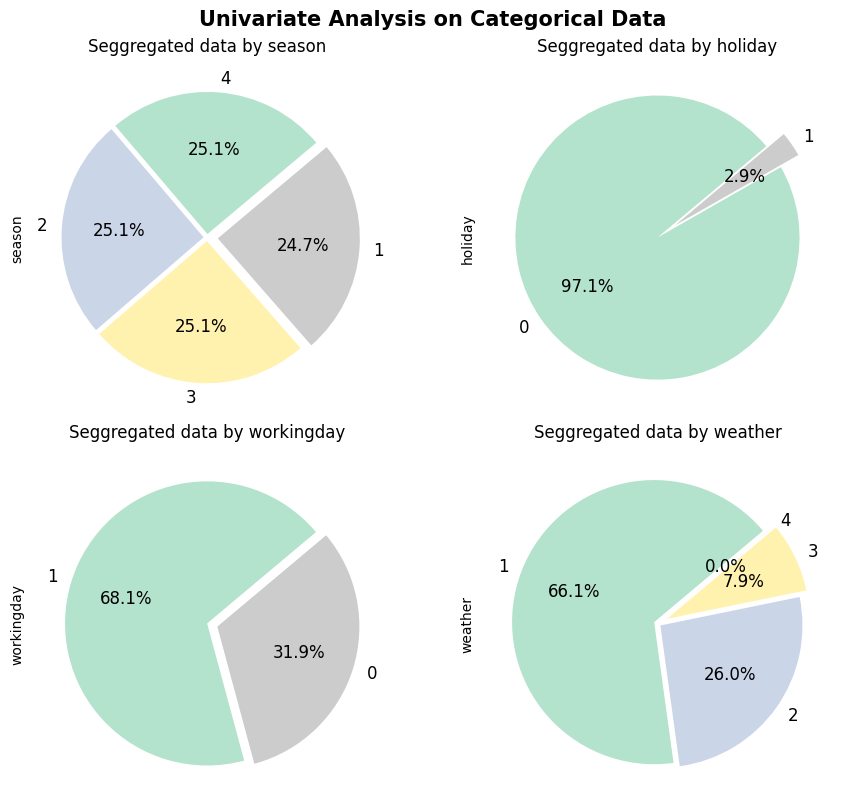

In [ ]:
fig, ax = plt.subplots(Rows_pie, Columns_pie, figsize=(10, 11), layout="constrained")
fig.suptitle("Univariate Analysis on Categorical Data", fontsize=15, fontweight='bold')
for i in range(Rows_pie):
  for j in range(Columns_pie):
    title = column_title_pie[i][j]
    if title == '': break
    elif title == 'season': explode_vals = (0.025,0.025,0.025,0.075)
    elif title == 'holiday': explode_vals = (0,0.15)
    elif title == 'workingday': explode_vals = (0,0.075)
    elif title == 'weather': explode_vals = (0.025,0.025,0.075,0.025)
    data[title].value_counts().plot(kind='pie', ax = ax[i,j], explode = explode_vals, **kwargs)
    # data[title].value_counts().plot(kind='pie', ax = ax[i,j], **kwargs)
    updated_title = title  # labelSep(title)
    set_title = f'Seggregated data by {updated_title}'
    ax[i,j].set_title(set_title)
    # ax[i,j].set_ylabel(updated_title)
plt.show()


### **e. Check for Outliers and deal with them accordingly.**

###### ***i. Detecting the Outliers by calculating IQR and plotting them***
- Boxplot, Interquartile Range (IQR)

In [ ]:
# column_title = np.array(data.describe().columns)
column_title = np.array(data.columns[1:])
column_title = np.append(column_title, [''])
column_title = column_title.reshape(4, -1)
# column_title = data.columns[1:]
column_title

array([['season', 'holiday', 'workingday'],
       ['weather', 'temp', 'atemp'],
       ['humidity', 'windspeed', 'casual'],
       ['registered', 'count', '']], dtype=object)

In [ ]:
Rows = column_title.shape[0]
Columns = column_title.shape[1]
print(f"Rows: {Rows}; Columns: {Columns}")

Rows: 4; Columns: 3


In [ ]:
def detectOutliers(df, i, title):

  Quart1, Quart3 = data[title].quantile([.25, .75])

  df.loc[i, 'title'] = title

  df.loc[i, 'Quartile_1'] = Quart1
  df.loc[i, 'Quartile_3'] = Quart3

  IQR = Quart3 - Quart1
  df.loc[i, 'IQR'] = IQR

  lower_bound = Quart1 - (1.5 * IQR)
  df.loc[i, 'Lower_bound'] = lower_bound

  upper_bound = Quart3 + (1.5 * IQR)
  df.loc[i, 'Upper_bound'] = upper_bound

  return df


In [ ]:
df_outlier = pd.DataFrame()
k = 0

for i in range(Rows):
  for j in range(Columns):
    title = column_title[i][j]
    if title == '': break
    detectOutliers(df_outlier, k, title)
    k += 1
    # print(title)

df_outlier.T

,0,1,2,3,4,5,6,7,8,9,10
title,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
Quartile_1,2.0,0.0,0.0,1.0,13.94,16.665,47.0,7.0015,4.0,36.0,42.0
Quartile_3,4.0,0.0,1.0,2.0,26.24,31.06,77.0,16.9979,49.0,222.0,284.0
IQR,2.0,0.0,1.0,1.0,12.3,14.395,30.0,9.9964,45.0,186.0,242.0
Lower_bound,-1.0,0.0,-1.5,-0.5,-4.51,-4.9275,2.0,-7.9931,-63.5,-243.0,-321.0
Upper_bound,7.0,0.0,2.5,3.5,44.69,52.6525,122.0,31.9925,116.5,501.0,647.0


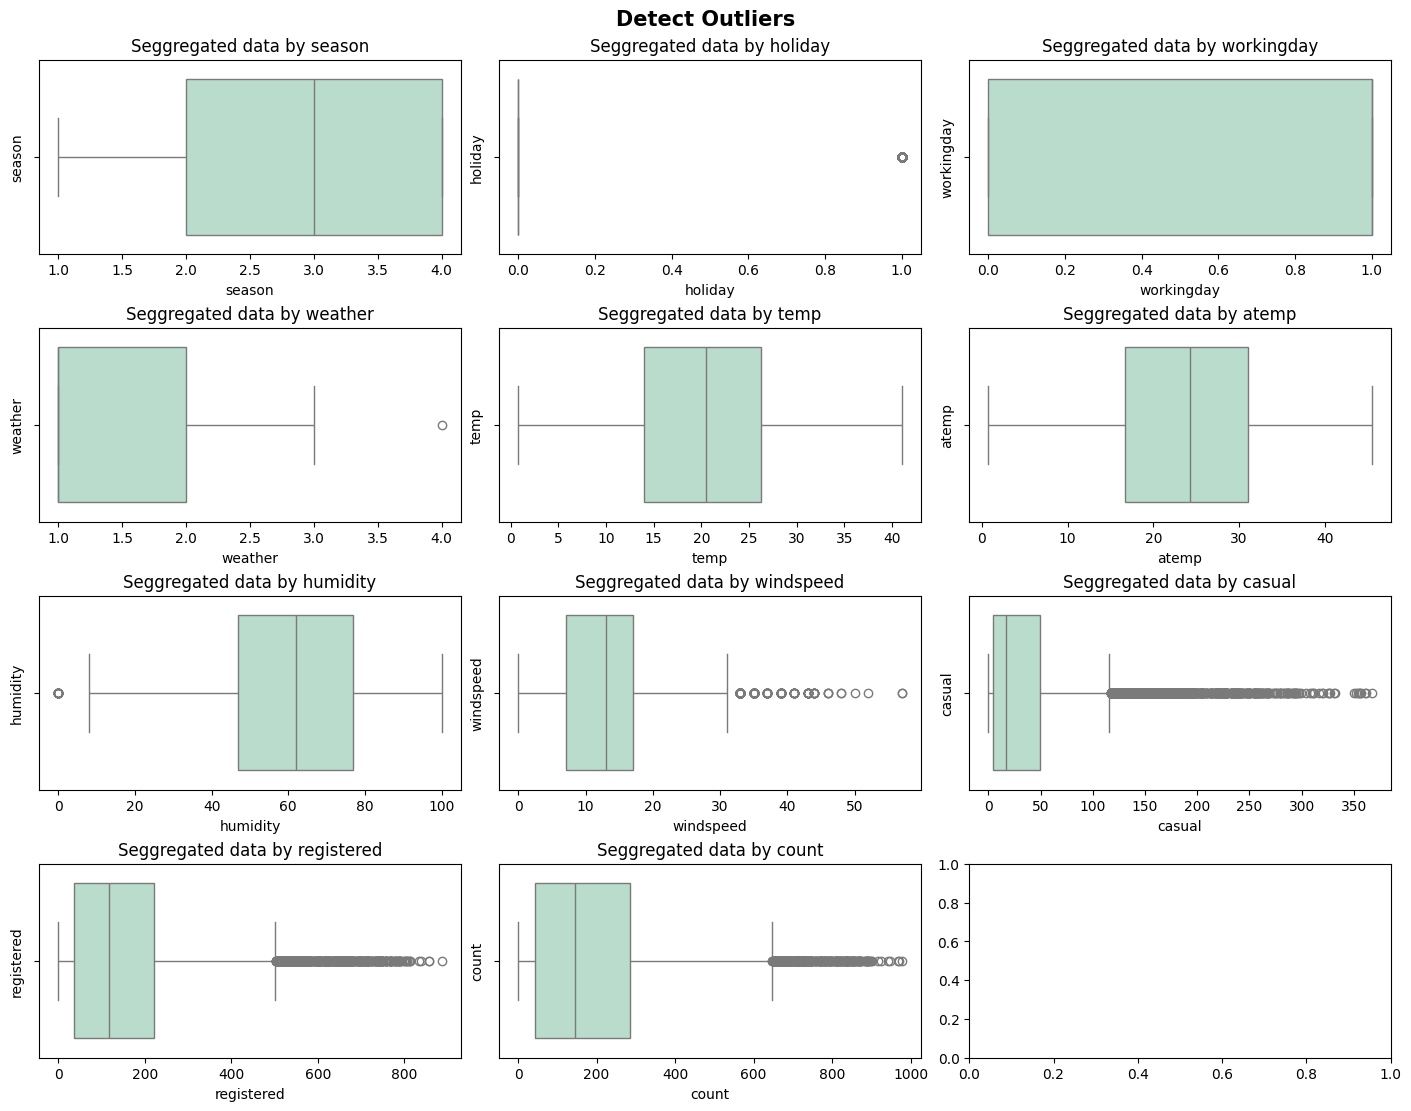

In [ ]:
fig, ax = plt.subplots(Rows, Columns, figsize=(14, 11), layout="constrained")
fig.suptitle("Detect Outliers", fontsize=15, fontweight='bold')
for i in range(Rows):
  for j in range(Columns):
    title = column_title[i][j]
    if title == '': break
    sns.boxplot(data, x = title, ax = ax[i,j], color='#b3e2cd')
    updated_title = title
    set_title = f'Seggregated data by {updated_title}'
    ax[i,j].set_title(set_title)
    ax[i,j].set_ylabel(updated_title)
plt.show()

###### ***ii. Remove/Clip existing outliers as necessary.***
 - Remove/clip the data between the 5 percentile and 95 percentile

In [ ]:
def clipped_df_cols(x, title):
  clipped_df = x[(x[title] >= np.percentile(x[title], 5)) & (x[title] <= np.percentile(x[title], 95))]
  return clipped_df

In [ ]:
def clipData(title, val):
  clip = np.clip(data[title],np.percentile(data[title], 5),np.percentile(data[title], 95))
  clip = clip.value_counts().sort_index()
  if val == 1:
    return clip.to_frame()
  return clip

In [ ]:
data_clip = data.copy()
data_clip

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
df_clip = pd.DataFrame()
k = 0

print("Clipped data of 5 and 95 percentile:")
print("**** **** **** **** **** **** **** ****")
for i in range(Rows):
  for j in range(Columns):
    title = column_title[i][j]
    if title == '': break
    percentile_5 = np.round(np.min(clipData(title, None).index),2)
    percentile_95 = np.round(np.max(clipData(title, None).index),2)
    # print(f'{title}: 5 percentile: {percentile_5} | 95 percentile: {percentile_95}')
    data_clip = clipped_df_cols(data_clip, title)
    df_clip.loc[k, 'Category'] = title
    df_clip.loc[k, '5_percentile'] = percentile_5
    df_clip.loc[k, '95_percentile'] = percentile_95
    k += 1

df_clip.T

Clipped data of 5 and 95 percentile:
**** **** **** **** **** **** **** ****


,0,1,2,3,4,5,6,7,8,9,10
Category,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
5_percentile,1.0,0.0,0.0,1.0,8.2,9.85,31.0,0.0,0.0,4.0,5.0
95_percentile,4.0,0.0,1.0,3.0,32.8,36.36,93.0,28.0,141.0,464.0,563.75


In [ ]:
data_clip

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
data_clip = data_clip.reset_index(drop=True)
data_clip

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...
6372,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
6373,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
6374,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
6375,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
data_clip.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,6377,6377.000000,6377.0,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000
unique,6377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.616591,0.0,0.696409,1.460875,19.804601,23.312371,65.975223,11.220973,23.745492,118.594480,142.339972
std,NaN,1.121225,0.0,0.459844,0.643772,6.327154,6.815608,16.771240,6.700735,25.494728,88.902848,104.822185
min,NaN,1.000000,0.0,0.000000,1.000000,8.200000,11.365000,31.000000,0.000000,0.000000,4.000000,7.000000
25%,NaN,2.000000,0.0,0.000000,1.000000,13.940000,17.425000,52.000000,7.001500,5.000000,40.000000,47.000000
50%,NaN,3.000000,0.0,1.000000,1.000000,19.680000,23.485000,66.000000,11.001400,14.000000,105.000000,126.000000
75%,NaN,4.000000,0.0,1.000000,2.000000,25.420000,29.545000,81.000000,16.997900,34.000000,177.000000,218.000000


In [ ]:
data_clip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6377 entries, 0 to 6376
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6377 non-null   object 
 1   season      6377 non-null   int64  
 2   holiday     6377 non-null   int64  
 3   workingday  6377 non-null   int64  
 4   weather     6377 non-null   int64  
 5   temp        6377 non-null   float64
 6   atemp       6377 non-null   float64
 7   humidity    6377 non-null   int64  
 8   windspeed   6377 non-null   float64
 9   casual      6377 non-null   int64  
 10  registered  6377 non-null   int64  
 11  count       6377 non-null   int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 598.0+ KB


In [ ]:
# Finding the number of row(s) and column(s) of the dataset
print(f'Shape of the dataset: {data_clip.shape}')
print(f'Number of rows: {data_clip.shape[0]}')
print(f'Number of columns: {data_clip.shape[1]}')

Shape of the dataset: (6377, 12)
Number of rows: 6377
Number of columns: 12


## **Try establishing a Relationship between the Dependent and Independent Variables.**

###### ***i. Plot a Correlation Heatmap and draw insights.***

In [ ]:
data_clip.iloc[:,1:]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
...,...,...,...,...,...,...,...,...,...,...,...
6372,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
6373,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
6374,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
6375,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
data_clip['holiday'].value_counts()

0    6377
Name: holiday, dtype: int64

In [ ]:
# Dropping datetime and holiday, as these leads to uncertain data (i.e., NaN)
# data_clip_1 = data_clip
data_clip_1 = data_clip.drop(['datetime', 'holiday'], axis=1)
data_clip_1

,season,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,1,9.84,14.395,81,0.0000,3,13,16
1,1,0,1,9.02,13.635,80,0.0000,8,32,40
2,1,0,1,9.02,13.635,80,0.0000,5,27,32
3,1,0,1,9.84,14.395,75,0.0000,3,10,13
4,1,0,1,9.84,14.395,75,0.0000,1,7,8
...,...,...,...,...,...,...,...,...,...,...
6372,4,1,1,15.58,19.695,50,26.0027,7,329,336
6373,4,1,1,14.76,17.425,57,15.0013,10,231,241
6374,4,1,1,13.94,15.910,61,15.0013,4,164,168
6375,4,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
data_clip_corr = data_clip_1.corr()
data_clip_corr

,season,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,-0.001606,-0.007857,0.102309,0.097619,0.144745,-0.077377,0.023070,0.107183,0.096516
workingday,-0.001606,1.000000,0.036161,0.093408,0.088003,-0.081264,0.048824,-0.189108,0.170306,0.098447
weather,-0.007857,0.036161,1.000000,-0.021236,-0.031936,0.387398,0.053389,-0.092109,-0.047704,-0.062862
temp,0.102309,0.093408,-0.021236,1.000000,0.982559,0.056486,0.001609,0.395987,0.143769,0.218246
atemp,0.097619,0.088003,-0.031936,0.982559,1.000000,0.054607,-0.032017,0.397521,0.143170,0.218111
humidity,0.144745,-0.081264,0.387398,0.056486,0.054607,1.000000,-0.247357,-0.294701,-0.267696,-0.298718
windspeed,-0.077377,0.048824,0.053389,0.001609,-0.032017,-0.247357,1.000000,0.105856,0.114141,0.122553
casual,0.023070,-0.189108,-0.092109,0.395987,0.397521,-0.294701,0.105856,1.000000,0.536937,0.698611
registered,0.107183,0.170306,-0.047704,0.143769,0.143170,-0.267696,0.114141,0.536937,1.000000,0.978723
count,0.096516,0.098447,-0.062862,0.218246,0.218111,-0.298718,0.122553,0.698611,0.978723,1.000000


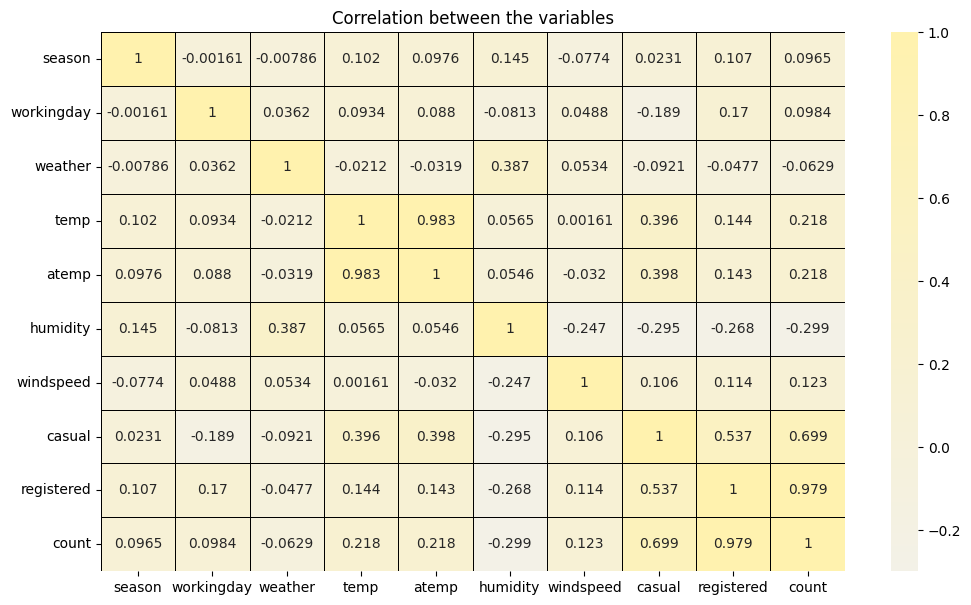

In [ ]:
plt.figure(figsize=(12, 7))
plt.title('Correlation between the variables')
# sns.heatmap(data_clip_corr, linewidths=0.5, linecolor='black', fmt='.3g', cmap=sns.color_palette("dark:#b3f5f3", as_cmap=True), annot=True)
sns.heatmap(data_clip_corr, linewidths=0.5, linecolor='black', fmt='.3g', cmap=sns.color_palette("light:#fff2ae", as_cmap=True), annot=True)
# plt.yticks(rotation=0)
plt.show()

While verifying the relationship between the Dependent and Independent Variables, we could able to observe correlation coefficients as follows:

- The variables ***temp*** & ***atemp*** exhibit the strongest correlation, with a value of **0.983**.
- Following closely, variables ***count*** & ***registered*** with a correlation coefficient of **0.979**.
- Other correlations observed are generally falls below **0.7**.
- Additionally observed negative correlation ranging upto **-0.299**, a negative correlation of **-0.299** is between ***count*** & ***humidity***.


###### ***ii. Remove the highly correlated variables, if any.***

In [ ]:
data_clip_corr

,season,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,-0.001606,-0.007857,0.102309,0.097619,0.144745,-0.077377,0.023070,0.107183,0.096516
workingday,-0.001606,1.000000,0.036161,0.093408,0.088003,-0.081264,0.048824,-0.189108,0.170306,0.098447
weather,-0.007857,0.036161,1.000000,-0.021236,-0.031936,0.387398,0.053389,-0.092109,-0.047704,-0.062862
temp,0.102309,0.093408,-0.021236,1.000000,0.982559,0.056486,0.001609,0.395987,0.143769,0.218246
atemp,0.097619,0.088003,-0.031936,0.982559,1.000000,0.054607,-0.032017,0.397521,0.143170,0.218111
humidity,0.144745,-0.081264,0.387398,0.056486,0.054607,1.000000,-0.247357,-0.294701,-0.267696,-0.298718
windspeed,-0.077377,0.048824,0.053389,0.001609,-0.032017,-0.247357,1.000000,0.105856,0.114141,0.122553
casual,0.023070,-0.189108,-0.092109,0.395987,0.397521,-0.294701,0.105856,1.000000,0.536937,0.698611
registered,0.107183,0.170306,-0.047704,0.143769,0.143170,-0.267696,0.114141,0.536937,1.000000,0.978723
count,0.096516,0.098447,-0.062862,0.218246,0.218111,-0.298718,0.122553,0.698611,0.978723,1.000000


In [ ]:
# Select upper triangle of correlation matrix
upper = data_clip_corr.where(np.triu(np.ones(data_clip_corr.shape), k=1).astype(bool))

# Find features with correlation greater than or equal to 0.98
to_drop = [column for column in upper.columns if any(upper[column] >= 0.98)]

# Drop features
data_clip_drop = data_clip.drop(to_drop, axis=1)

In [ ]:
data_clip_drop = data_clip_drop.reset_index(drop=True)
data_clip_drop

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0000,3,10,13
4,2011-01-01 08:00:00,1,0,0,1,9.84,75,0.0000,1,7,8
...,...,...,...,...,...,...,...,...,...,...,...
6372,2012-12-19 19:00:00,4,0,1,1,15.58,50,26.0027,7,329,336
6373,2012-12-19 20:00:00,4,0,1,1,14.76,57,15.0013,10,231,241
6374,2012-12-19 21:00:00,4,0,1,1,13.94,61,15.0013,4,164,168
6375,2012-12-19 22:00:00,4,0,1,1,13.94,61,6.0032,12,117,129


## **Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?**

### **a. Formulate Null Hypothesis (H$_0$) and Alternate Hypothesis (H$_1$)**

In [ ]:
H0 = 'There is no significant difference between the no. of bike rides on Weekdays and Weekends'
H1 = 'There is a significant difference between the no. of bike rides on Weekdays and Weekends'

In [ ]:
data_clip_drop

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0000,3,10,13
4,2011-01-01 08:00:00,1,0,0,1,9.84,75,0.0000,1,7,8
...,...,...,...,...,...,...,...,...,...,...,...
6372,2012-12-19 19:00:00,4,0,1,1,15.58,50,26.0027,7,329,336
6373,2012-12-19 20:00:00,4,0,1,1,14.76,57,15.0013,10,231,241
6374,2012-12-19 21:00:00,4,0,1,1,13.94,61,15.0013,4,164,168
6375,2012-12-19 22:00:00,4,0,1,1,13.94,61,6.0032,12,117,129


In [ ]:
# workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
data_weekend = data_clip_drop[data_clip_drop['workingday'] == 0]
data_weekday = data_clip_drop[data_clip_drop['workingday'] == 1]

In [ ]:
weekend_rides = data_weekend[['count']]
weekend_rides

,count
0,16
1,40
2,32
3,13
4,8
...,...
6318,109
6319,122
6320,106
6321,89


In [ ]:
weekday_rides = data_weekday[['count']]
weekday_rides

,count
36,157
37,110
38,52
39,78
40,97
...,...
6372,336
6373,241
6374,168
6375,129


In [ ]:
weekday_rides.mean()

count    149.152893
dtype: float64

In [ ]:
weekend_rides.mean()

count    126.711777
dtype: float64

### **b. Select an appropriate test -**
> i. 2 - Sample Independent T-test

### **c. Set a significance level**
  > i. alpha=5% is recommended

### **d. Calculate test Statistics / p-value**
### **e. Decide whether to accept or reject the Null Hypothesis.**
> i. If the p-value is less than or equal to the predetermined level of
significance (alpha), we have evidence to reject the null hypothesis.  
> ii. If the p-value is greater than the predetermined level of significance
(alpha), we do not have sufficient evidence to reject the null hypothesis.

In [ ]:
tstat, pvalue = st.ttest_ind(weekday_rides, weekend_rides, alternative = 'greater')
tstat, pvalue

(array([7.89872253]), array([1.64754962e-15]))

In [ ]:
alpha = 5/100  # alpha=5% is recommended

print(f'2 - Sample Independent T-test for Bike rides on Weekdays and Weekends:')
print('***** ***** ***** ***** ***** ***** ***** ***** ***** ***** ***** *****')

print(f'Test statistics: {tstat[0]}')
print(f'pvalue: {pvalue[0]}\n')

if pvalue < alpha:
  print(f'Reject Null Hypothesis; \nClaimed: {H1}')
else:
  print(f'Fail to Reject Null Hypothesis: {H0}')


2 - Sample Independent T-test for Bike rides on Weekdays and Weekends:
***** ***** ***** ***** ***** ***** ***** ***** ***** ***** ***** *****
Test statistics: 7.898722526322731
pvalue: 1.6475496154791713e-15

Reject Null Hypothesis; 
Claimed: There is a significant difference between the no. of bike rides on Weekdays and Weekends


###### ***Plots: (Count & Histogram)***

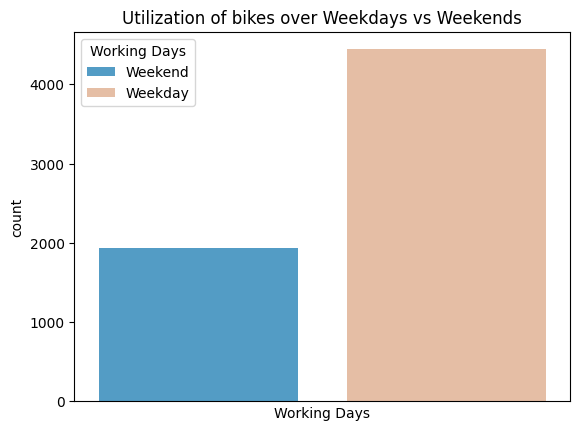

In [ ]:
sns.countplot(data_clip_drop, x='workingday', hue='workingday'
                  , palette=sns.color_palette(["#40A2D8", "#EFBC9B"], as_cmap=True))
plt.title('Utilization of bikes over Weekdays vs Weekends')
plt.xlabel('Working Days')
plt.xticks([])
plt.legend(title='Working Days', labels=['Weekend', 'Weekday'])
plt.show()

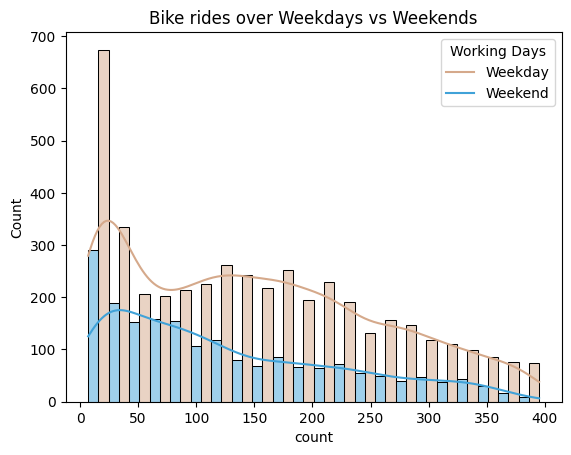

In [ ]:
sns.histplot(data_clip_drop, x='count', hue='workingday', multiple='dodge', kde=True
             , palette=sns.color_palette(["#40A2D8", "#d5a98b"], as_cmap=True))
plt.title('Bike rides over Weekdays vs Weekends')
plt.legend(title='Working Days', labels=['Weekday', 'Weekend'])
plt.show()

### **f. Draw inferences & conclusions from the analysis and provide recommendations.**

**Test outcome:**  
After performing T-Test analysis, the hypothesis test rejects the Null Hypothesis (*H$_0$*) and claimed the Alternate Hypothesis (*H$_1$*), proving there is a significant difference between the no. of bike rides on Weekdays and Weekends.

**Inferences:**  
Usage of bike rides on weekdays was heavy comparing to weekend days which signifies the bikes are utilized most likely for going to schools, colleges, offices etc., rather than utilizing for going to shopping malls, theatre or any other entertainment or leisure time spending places.

**Recommendations:**
- Providing more bikes to commute on weekdays increases the revenue.
- Generating dependency for weekend utilization of bikes by providing offers upon the utilization of bikes in weekdays may lead to increase the demand of bikes over the weekend and increases the revenue as well.

## **Check if the demand of bicycles on rent is the same for different Weather conditions?**

### **a. Formulate Null Hypothesis (H$_0$) and Alternate Hypothesis (H$_1$)**

In [ ]:
WC_H0 = 'Demand of bicycles on rent is the same for different Weather conditions'
WC_H1 = 'Demand of bicycles on rent is not the same for different Weather conditions'

In [ ]:
data_clip_drop

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0000,3,10,13
4,2011-01-01 08:00:00,1,0,0,1,9.84,75,0.0000,1,7,8
...,...,...,...,...,...,...,...,...,...,...,...
6372,2012-12-19 19:00:00,4,0,1,1,15.58,50,26.0027,7,329,336
6373,2012-12-19 20:00:00,4,0,1,1,14.76,57,15.0013,10,231,241
6374,2012-12-19 21:00:00,4,0,1,1,13.94,61,15.0013,4,164,168
6375,2012-12-19 22:00:00,4,0,1,1,13.94,61,6.0032,12,117,129


In [ ]:
data_clip_drop['weather'].value_counts()

1    3967
2    1881
3     529
Name: weather, dtype: int64

In [ ]:
data_weather1 = data_clip_drop[data_clip_drop['weather'] == 1]
data_weather2 = data_clip_drop[data_clip_drop['weather'] == 2]
data_weather3 = data_clip_drop[data_clip_drop['weather'] == 3]

In [ ]:
bike_rent_w1 = data_weather1[['count']]
bike_rent_w1

,count
0,16
1,40
2,32
3,13
4,8
...,...
6372,336
6373,241
6374,168
6375,129


In [ ]:
bike_rent_w2 = data_weather2[['count']]
bike_rent_w2

,count
9,94
10,106
11,110
12,93
13,67
...,...
6338,120
6339,54
6341,18
6342,15


In [ ]:
bike_rent_w3 = data_weather3[['count']]
bike_rent_w3

,count
14,35
15,37
22,8
28,59
29,74
...,...
6303,96
6317,107
6335,302
6340,47


### **b. Select an appropriate test -**
> i. One-way ANOVA test

In [ ]:
brw_tstat, brw_pvalue = st.f_oneway(bike_rent_w1, bike_rent_w2, bike_rent_w3)
brw_tstat, brw_pvalue

(array([21.66492376]), array([4.19642591e-10]))

In [ ]:
print(f'One-way ANOVA test outcome on rented Bike for different Weather conditions:')
print('***** ***** ***** ***** ***** ***** ***** ***** ***** ***** ***** ***** *****')

print(f'Test statistics: {brw_tstat[0]}')
print(f'pvalue: {brw_pvalue[0]}\n')

if brw_pvalue < alpha:
  print(f'Reject Null Hypothesis; \nClaimed: {WC_H1}')
else:
  print(f'Fail to Reject Null Hypothesis: {WC_H0}')

One-way ANOVA test outcome on rented Bike for different Weather conditions:
***** ***** ***** ***** ***** ***** ***** ***** ***** ***** ***** ***** *****
Test statistics: 21.66492375926347
pvalue: 4.196425907155538e-10

Reject Null Hypothesis; 
Claimed: Demand of bicycles on rent is not the same for different Weather conditions


###### ii. Kruskal-Wallis test

In [ ]:
k_brw_tstat, k_brw_pvalue = st.kruskal(bike_rent_w1, bike_rent_w2, bike_rent_w3)
k_brw_tstat, k_brw_pvalue

(array([36.70257532]), array([1.07185746e-08]))

In [ ]:
print(f'Kruskal-Wallis test outcome on rented Bike for different Weather conditions:')
print('***** ***** ***** ***** ***** ***** ***** ***** ***** ***** ***** ***** *****')

print(f'Test statistics: {k_brw_tstat[0]}')
print(f'pvalue: {k_brw_pvalue[0]}\n')

if k_brw_pvalue < alpha:
  print(f'Reject Null Hypothesis; \nAtleast one group have different median')
else:
  print(f'Fail to Reject Null Hypothesis; \nAll groups have same median')

Kruskal-Wallis test outcome on rented Bike for different Weather conditions:
***** ***** ***** ***** ***** ***** ***** ***** ***** ***** ***** ***** *****
Test statistics: 36.70257532089391
pvalue: 1.0718574558364013e-08

Reject Null Hypothesis; 
Atleast one group have different median


### **c. Check assumptions of the test**
> i. Normality
1. Use Histogram, Q-Q Plot, Skewness & Kurtosis
2. Shapiro-Wilk’s test

> ii. Equality Variance
1. Levene’s test

> iii. Please continue doing the analysis even if some assumptions fail
(Levene’s test or Shapiro-wilk test) but double check using visual
analysis and report wherever necessary.

### **d. Set a significance level and Calculate the test Statistics / p-value.**
> i. alpha=5% is recommended
### **e. Decide whether to accept or reject the Null Hypothesis.**

##### **Normality test**

###### ***Using Histogram***

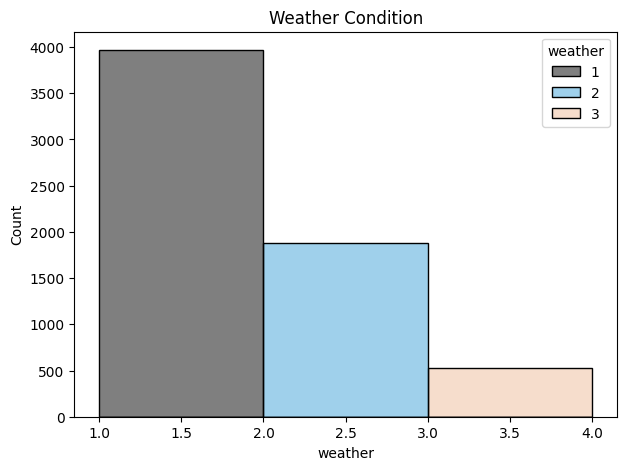

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(data_clip_drop, x='weather', bins=[1,2,3,4], hue='weather', palette=sns.color_palette(["#000000", "#40A2D8", "#EFBC9B"], as_cmap=True))
plt.title('Weather Condition')
plt.show()

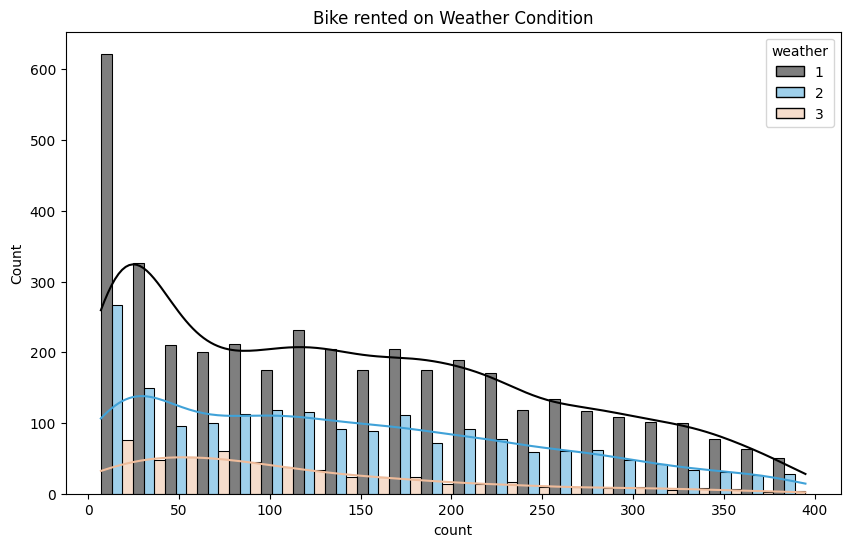

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data_clip_drop, x='count', hue='weather'
, palette=sns.color_palette(["#000000", "#40A2D8", "#EFBC9B"], as_cmap=True), multiple='dodge', kde=True)
plt.title('Bike rented on Weather Condition')
plt.show()

###### ***Using QQ Plot***

In [ ]:
from statsmodels.graphics.gofplots import qqplot

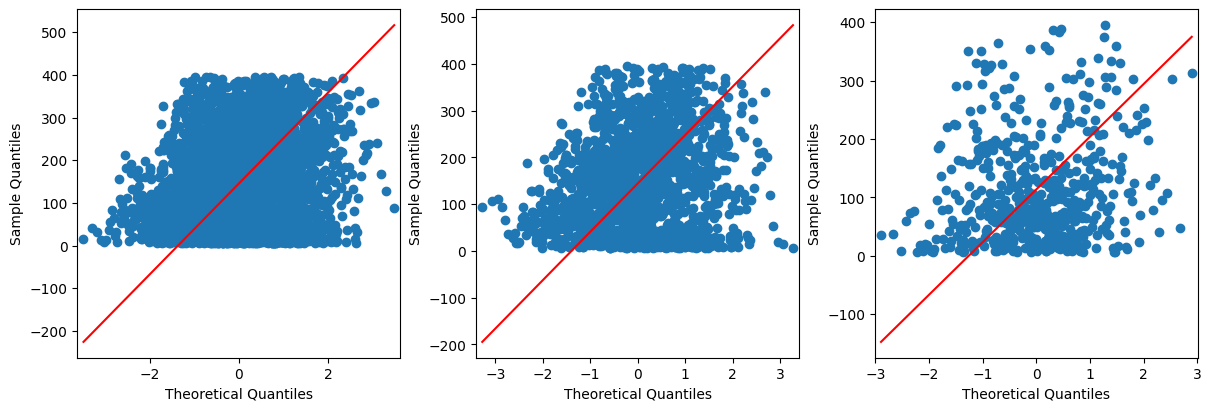

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(12,4), layout="constrained")
qqplot(bike_rent_w1, line='s', ax = ax[0])

qqplot(bike_rent_w2, line='s', ax = ax[1])

qqplot(bike_rent_w3, line='s', ax = ax[2])

plt.show()

##### ***Using Skewness & Kurtosis***

###### ***Using Skewness***

In [ ]:
bike_rent_w1.skew()

count    0.454385
dtype: float64

In [ ]:
bike_rent_w2.skew()

count    0.509884
dtype: float64

In [ ]:
bike_rent_w3.skew()

count    1.04653
dtype: float64

###### ***Using Kurtosis***

In [ ]:
bike_rent_w1.kurt()

count   -0.878388
dtype: float64

In [ ]:
bike_rent_w2.kurt()

count   -0.730779
dtype: float64

In [ ]:
bike_rent_w3.kurt()

count    0.407803
dtype: float64

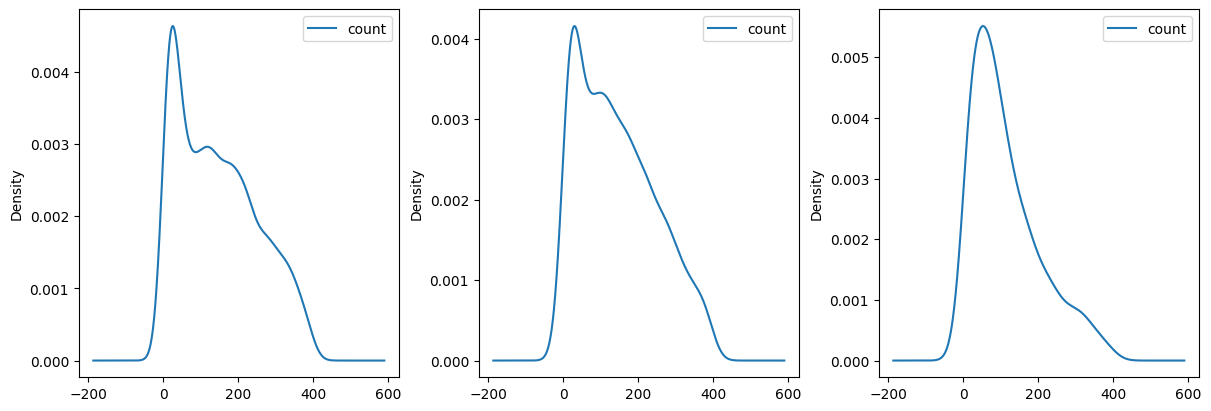

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(12,4), layout="constrained")
bike_rent_w1.plot(kind='density', ax = ax[0])

bike_rent_w2.plot(kind='density', ax = ax[1])

bike_rent_w3.plot(kind='density', ax = ax[2])

plt.show()

##### ***Using Shapiro-Wilk***

In [ ]:
sw_brw_tstat1, sw_brw_pvalue1 = st.shapiro(bike_rent_w1)

print(f'Shapiro Wilk test on rented Bike for Weather Condition 1:')
print('***** ***** ***** ***** ***** ***** ***** ***** ***** *****')
print(f'Test statistics: {sw_brw_tstat1}')
print(f'pvalue: {sw_brw_pvalue1}\n')

if sw_brw_pvalue1 < alpha:
  print(f'Reject Null Hypothesis; \nData is not Gaussian')
else:
  print(f'Fail to Reject Null Hypothesis; \nData is Gaussian')


Shapiro Wilk test on rented Bike for Weather Condition 1:
***** ***** ***** ***** ***** ***** ***** ***** ***** *****
Test statistics: 0.9364480972290039
pvalue: 3.256127737147747e-38

Reject Null Hypothesis; 
Data is not Gaussian


In [ ]:
sw_brw_tstat2, sw_brw_pvalue2 = st.shapiro(bike_rent_w2)

print(f'Shapiro Wilk test on rented Bike for Weather Condition 2:')
print('***** ***** ***** ***** ***** ***** ***** ***** ***** *****')
print(f'Test statistics: {sw_brw_tstat2}')
print(f'pvalue: {sw_brw_pvalue2}\n')

if sw_brw_pvalue2 < alpha:
  print(f'Reject Null Hypothesis; \nData is not Gaussian')
else:
  print(f'Fail to Reject Null Hypothesis; \nData is Gaussian')


Shapiro Wilk test on rented Bike for Weather Condition 2:
***** ***** ***** ***** ***** ***** ***** ***** ***** *****
Test statistics: 0.9411510825157166
pvalue: 1.0384998675752875e-26

Reject Null Hypothesis; 
Data is not Gaussian


In [ ]:
sw_brw_tstat3, sw_brw_pvalue3 = st.shapiro(bike_rent_w3)

print(f'Shapiro Wilk test on rented Bike for Weather Condition 3:')
print('***** ***** ***** ***** ***** ***** ***** ***** ***** *****')
print(f'Test statistics: {sw_brw_tstat3}')
print(f'pvalue: {sw_brw_pvalue3}\n')

if sw_brw_pvalue3 < alpha:
  print(f'Reject Null Hypothesis; \nData is not Gaussian')
else:
  print(f'Fail to Reject Null Hypothesis; \nData is Gaussian')


Shapiro Wilk test on rented Bike for Weather Condition 3:
***** ***** ***** ***** ***** ***** ***** ***** ***** *****
Test statistics: 0.8986287117004395
pvalue: 3.125081736780438e-18

Reject Null Hypothesis; 
Data is not Gaussian


##### **Equality Variance**

In [ ]:
lv_brw_tstat, lv_brw_pvalue = st.levene(bike_rent_w1['count'], bike_rent_w2['count'], bike_rent_w3['count'])

print(f'Levene test on rented Bike for different Weather Conditions:')
print('***** ***** ***** ***** ***** ***** ***** ***** ***** *****')
print(f'Test statistics: {lv_brw_tstat}')
print(f'pvalue: {lv_brw_pvalue}\n')

if lv_brw_pvalue < alpha:
  print(f'Reject Null Hypothesis; \nVariances are not equal')
else:
  print(f'Fail to Reject Null Hypothesis; \nVariances are equal')


Levene test on rented Bike for different Weather Conditions:
***** ***** ***** ***** ***** ***** ***** ***** ***** *****
Test statistics: 29.41663358872987
pvalue: 1.9191907344782608e-13

Reject Null Hypothesis; 
Variances are not equal


### **f. Draw inferences & conclusions from the analysis and provide recommendations.**

**Test outcome:**  
After performing various Test analysis, the hypothesis test rejects the Null Hypothesis (*H$_0$*) and claimed the Alternate Hypothesis (*H$_1$*), proving there is a demand of bicycles on rent is not the same for different Weather conditions.

**Inferences:**  
Demand of bicycles on rent is different accross the different weather
conditions and the bicycles are getting demand most likely when the weather conditions are *Clear, Few clouds & Partly cloudy* comparing to the other weather conditions such as *Mist, Cloudy, Light Snow, Light Rain together with Thunderstorm & Scattered clouds*.

**Recommendations:**
- Providing more bicycles to commute on the weather conditions such as *Clear, Few clouds & Partly cloudy* increases the revenue.
- Providing adequate facility relevant to protect the commuters for safe riding on challenging weather conditions such as *Mist, Cloudy, Light Snow, Light Rain together with Thunderstorm & Scattered clouds* may leads to increase the demand in renting the bicycles and increases the revenue as well.


## **Check if the demand of bicycles on rent is the same for different Seasons?**

### **a. Formulate Null Hypothesis (H$_0$) and Alternate Hypothesis (H$_1$)**

In [ ]:
S_H0 = 'Demand of bicycles on rent is the same for different Seasons'
S_H1 = 'Demand of bicycles on rent is not the same for different Seasons'

In [ ]:
data_clip_drop

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0000,3,10,13
4,2011-01-01 08:00:00,1,0,0,1,9.84,75,0.0000,1,7,8
...,...,...,...,...,...,...,...,...,...,...,...
6372,2012-12-19 19:00:00,4,0,1,1,15.58,50,26.0027,7,329,336
6373,2012-12-19 20:00:00,4,0,1,1,14.76,57,15.0013,10,231,241
6374,2012-12-19 21:00:00,4,0,1,1,13.94,61,15.0013,4,164,168
6375,2012-12-19 22:00:00,4,0,1,1,13.94,61,6.0032,12,117,129


In [ ]:
data_clip_drop['season'].value_counts()

4    1913
2    1676
3    1447
1    1341
Name: season, dtype: int64

In [ ]:
data_season1 = data_clip_drop[data_clip_drop['season'] == 1]
data_season2 = data_clip_drop[data_clip_drop['season'] == 2]
data_season3 = data_clip_drop[data_clip_drop['season'] == 3]
data_season4 = data_clip_drop[data_clip_drop['season'] == 4]

In [ ]:
bike_rent_s1 = data_season1[['count']]
bike_rent_s1

,count
0,16
1,40
2,32
3,13
4,8
...,...
4009,385
4010,330
4011,223
4012,148


In [ ]:
bike_rent_s2 = data_season2[['count']]
bike_rent_s2

,count
566,7
567,12
568,28
569,95
570,206
...,...
4793,230
4794,292
4795,272
4796,291


In [ ]:
bike_rent_s3 = data_season3[['count']]
bike_rent_s3

,count
1458,68
1459,31
1460,13
1461,11
1462,30
...,...
5434,286
5435,311
5436,349
5437,229


In [ ]:
bike_rent_s4 = data_season4[['count']]
bike_rent_s4

,count
2264,130
2265,58
2266,19
2267,36
2268,67
...,...
6372,336
6373,241
6374,168
6375,129


### **b. Select an appropriate test -**
> i. One-way ANOVA test

In [ ]:
brs_tstat, brs_pvalue = st.f_oneway(bike_rent_s1, bike_rent_s2, bike_rent_s3, bike_rent_s4)
brs_tstat, brs_pvalue

(array([28.34757027]), array([3.34415554e-18]))

In [ ]:
print(f'One-way ANOVA test outcome on rented Bike for different Seasons:')
print('***** ***** ***** ***** ***** ***** ***** ***** ***** ***** *****')

print(f'Test statistics: {brs_tstat[0]}')
print(f'pvalue: {brs_pvalue[0]}\n')

if brs_pvalue < alpha:
  print(f'Reject Null Hypothesis; \nClaimed: {S_H1}')
else:
  print(f'Fail to Reject Null Hypothesis: {S_H0}')

One-way ANOVA test outcome on rented Bike for different Seasons:
***** ***** ***** ***** ***** ***** ***** ***** ***** ***** *****
Test statistics: 28.347570272565605
pvalue: 3.3441555426011744e-18

Reject Null Hypothesis; 
Claimed: Demand of bicycles on rent is not the same for different Seasons


###### ii. Kruskal-Wallis test

In [ ]:
k_brs_tstat, k_brs_pvalue = st.kruskal(bike_rent_s1, bike_rent_s2, bike_rent_s3, bike_rent_s4)
k_brs_tstat, k_brs_pvalue

(array([66.93333694]), array([1.93517746e-14]))

In [ ]:
print(f'Kruskal-Wallis test outcome on rented Bike for different Seasons:')
print('***** ***** ***** ***** ***** ***** ***** ***** ***** ***** *****')

print(f'Test statistics: {k_brs_tstat[0]}')
print(f'pvalue: {k_brs_pvalue[0]}\n')

if k_brs_pvalue < alpha:
  print(f'Reject Null Hypothesis; \nAtleast one group have different median')
else:
  print(f'Fail to Reject Null Hypothesis; \nAll groups have same median')

Kruskal-Wallis test outcome on rented Bike for different Seasons:
***** ***** ***** ***** ***** ***** ***** ***** ***** ***** *****
Test statistics: 66.9333369356586
pvalue: 1.9351774580164244e-14

Reject Null Hypothesis; 
Atleast one group have different median


### **c. Check assumptions of the test**
> i. Normality
1. Use Histogram, Q-Q Plot, Skewness & Kurtosis
2. Shapiro-Wilk’s test

> ii. Equality Variance
1. Levene’s test

> iii. Please continue doing the analysis even if some assumptions fail
(Levene’s test or Shapiro-wilk test) but double check using visual
analysis and report wherever necessary.

### **d. Set a significance level and Calculate the test Statistics / p-value.**
> i. alpha=5% is recommended
### **e. Decide whether to accept or reject the Null Hypothesis.**

##### **Normality test**

###### ***Using Histogram***

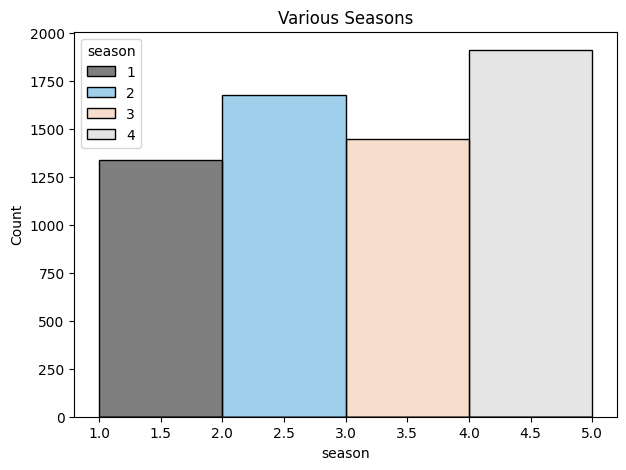

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(data_clip_drop, x='season', bins=[1,2,3,4,5], hue='season'
, palette=sns.color_palette(["#000000", "#40A2D8", "#EFBC9B", "#cccccc"], as_cmap=True))
plt.title('Various Seasons')
plt.show()

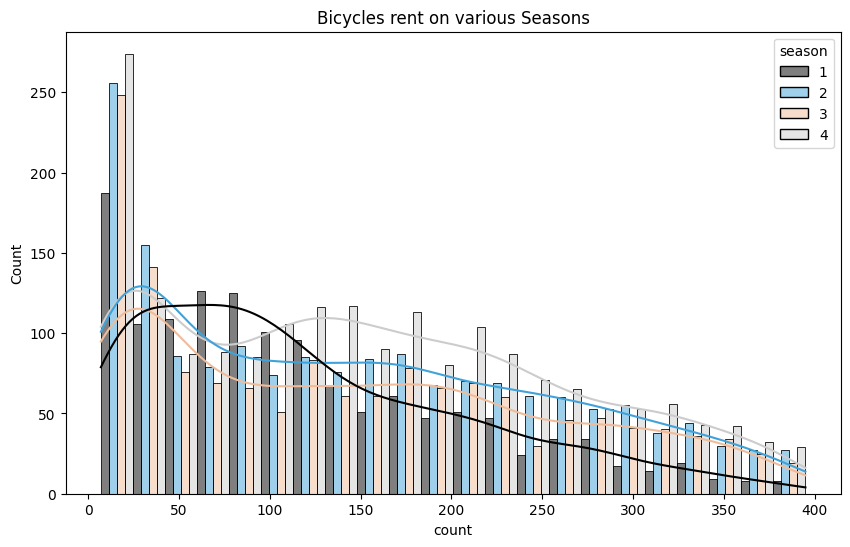

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data_clip_drop, x='count', hue='season'
, palette=sns.color_palette(["#000000", "#40A2D8", "#EFBC9B", "#cccccc"], as_cmap=True), multiple='dodge', kde=True)
plt.title('Bicycles rent on various Seasons')
plt.show()

###### ***Using QQ Plot***

In [ ]:
from statsmodels.graphics.gofplots import qqplot

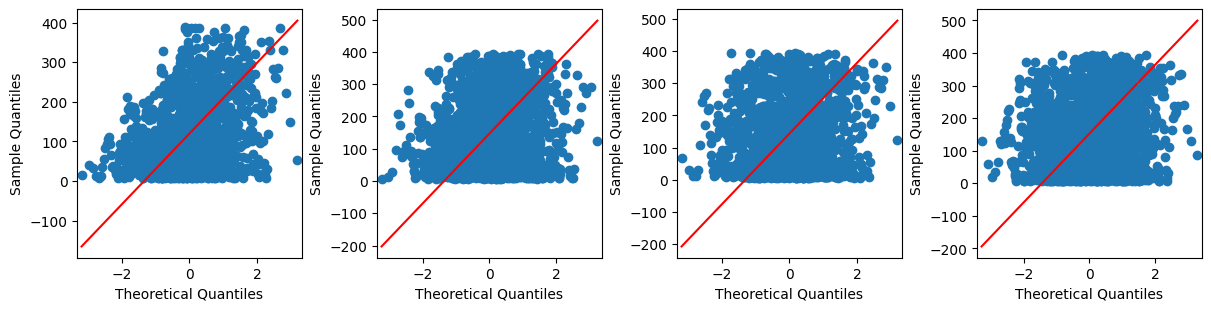

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(12,3), layout="constrained")
qqplot(bike_rent_s1, line='s', ax = ax[0])

qqplot(bike_rent_s2, line='s', ax = ax[1])

qqplot(bike_rent_s3, line='s', ax = ax[2])

qqplot(bike_rent_s4, line='s', ax = ax[3])

plt.show()

###### ***Using Skewness***

In [ ]:
bike_rent_s1.skew()

count    0.851971
dtype: float64

In [ ]:
bike_rent_s2.skew()

count    0.444036
dtype: float64

In [ ]:
bike_rent_s3.skew()

count    0.466162
dtype: float64

In [ ]:
bike_rent_s4.skew()

count    0.374855
dtype: float64

###### ***Using Kurtosis***

In [ ]:
bike_rent_s1.kurt()

count   -0.018245
dtype: float64

In [ ]:
bike_rent_s2.kurt()

count   -0.924352
dtype: float64

In [ ]:
bike_rent_s3.kurt()

count   -0.936646
dtype: float64

In [ ]:
bike_rent_s4.kurt()

count   -0.861714
dtype: float64

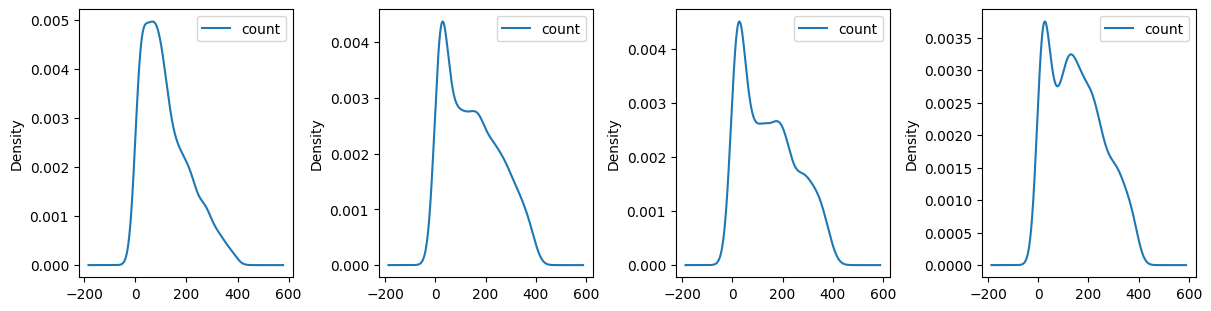

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(12,3), layout="constrained")

bike_rent_s1.plot(kind='density', ax = ax[0])

bike_rent_s2.plot(kind='density', ax = ax[1])

bike_rent_s3.plot(kind='density', ax = ax[2])

bike_rent_s4.plot(kind='density', ax = ax[3])

plt.show()

###### ***Using Shapiro-Wilk***

In [ ]:
sw_brs_tstat1, sw_brs_pvalue1 = st.shapiro(bike_rent_s1)

print(f'Shapiro Wilk test on rented Bike for Season 1:')
print('***** ***** ***** ***** ***** ***** ***** *****')
print(f'Test statistics: {sw_brs_tstat1}')
print(f'pvalue: {sw_brs_pvalue1}\n')

if sw_brs_pvalue1 < alpha:
  print(f'Reject Null Hypothesis; \nData is not Gaussian')
else:
  print(f'Fail to Reject Null Hypothesis; \nData is Gaussian')


Shapiro Wilk test on rented Bike for Season 1:
***** ***** ***** ***** ***** ***** ***** *****
Test statistics: 0.9226468205451965
pvalue: 1.1114684073800227e-25

Reject Null Hypothesis; 
Data is not Gaussian


In [ ]:
sw_brs_tstat2, sw_brs_pvalue2 = st.shapiro(bike_rent_s2)

print(f'Shapiro Wilk test on rented Bike for Season 2:')
print('***** ***** ***** ***** ***** ***** ***** *****')
print(f'Test statistics: {sw_brs_tstat2}')
print(f'pvalue: {sw_brs_pvalue2}\n')

if sw_brs_pvalue2 < alpha:
  print(f'Reject Null Hypothesis; \nData is not Gaussian')
else:
  print(f'Fail to Reject Null Hypothesis; \nData is Gaussian')


Shapiro Wilk test on rented Bike for Season 2:
***** ***** ***** ***** ***** ***** ***** *****
Test statistics: 0.9335547685623169
pvalue: 1.088968861767955e-26

Reject Null Hypothesis; 
Data is not Gaussian


In [ ]:
sw_brs_tstat3, sw_brs_pvalue3 = st.shapiro(bike_rent_s3)

print(f'Shapiro Wilk test on rented Bike for Season 3:')
print('***** ***** ***** ***** ***** ***** ***** *****')
print(f'Test statistics: {sw_brs_tstat3}')
print(f'pvalue: {sw_brs_pvalue3}\n')

if sw_brs_pvalue3 < alpha:
  print(f'Reject Null Hypothesis; \nData is not Gaussian')
else:
  print(f'Fail to Reject Null Hypothesis; \nData is Gaussian')


Shapiro Wilk test on rented Bike for Season 3:
***** ***** ***** ***** ***** ***** ***** *****
Test statistics: 0.9260410666465759
pvalue: 4.1976792532910616e-26

Reject Null Hypothesis; 
Data is not Gaussian


In [ ]:
sw_brs_tstat4, sw_brs_pvalue4 = st.shapiro(bike_rent_s4)

print(f'Shapiro Wilk test on rented Bike for Season 4:')
print('***** ***** ***** ***** ***** ***** ***** *****')
print(f'Test statistics: {sw_brs_tstat4}')
print(f'pvalue: {sw_brs_pvalue4}\n')

if sw_brs_pvalue4 < alpha:
  print(f'Reject Null Hypothesis; \nData is not Gaussian')
else:
  print(f'Fail to Reject Null Hypothesis; \nData is Gaussian')


Shapiro Wilk test on rented Bike for Season 4:
***** ***** ***** ***** ***** ***** ***** *****
Test statistics: 0.9498263597488403
pvalue: 4.601060811985497e-25

Reject Null Hypothesis; 
Data is not Gaussian


##### **Equality Variance**

In [ ]:
lv_brs_tstat, lv_brs_pvalue = st.levene(bike_rent_s1['count'], bike_rent_s2['count'], bike_rent_s3['count'], bike_rent_s4['count'])

print(f'Levene test on rented Bike for different Seasons:')
print('***** ***** ***** ***** ***** ***** ***** ***** *****')
print(f'Test statistics: {lv_brs_tstat}')
print(f'pvalue: {lv_brs_pvalue}\n')

if lv_brs_pvalue < alpha:
  print(f'Reject Null Hypothesis; \nVariances are not equal')
else:
  print(f'Fail to Reject Null Hypothesis; \nVariances are equal')


Levene test on rented Bike for different Seasons:
***** ***** ***** ***** ***** ***** ***** ***** *****
Test statistics: 43.93859668150165
pvalue: 4.259394009847224e-28

Reject Null Hypothesis; 
Variances are not equal


### **f. Draw inferences & conclusions from the analysis and provide recommendations.**

**Test outcome:**  
After performing various Test analysis, the hypothesis test rejects the Null Hypothesis (*H$_0$*) and claimed the Alternate Hypothesis (*H$_1$*), proving there is a demand of bicycles on rent is not the same for different Seasons.

**Inferences:**  
Demand of bicycles on rent is different accross the different seasons and the bikes are getting demand most likely at the winter season, next to that summer season and rest other seasons spring and fall are less in demand of bicycles.

**Recommendations:**
- Providing more bicycles to commute on the winter and summer season increases the revenue.
- Providing seasonal offers at the time of less demand in bicycles may leads to increase the demand in renting the bicycles and increases the revenue as well.


## **Check if the Weather conditions are significantly different during different Seasons?**

### **a. Formulate Null Hypothesis (H$_0$) and Alternate Hypothesis (H$_1$)**

In [ ]:
WS_H0 = 'Weather conditions are not significantly different during different Seasons'
WS_H1 = 'Weather conditions are significantly different during different Seasons'

In [ ]:
def createFeature(x, title, s_title):
  col_data = x[title]
  for i in range(len(col_data)):
    # print('W'+col_data[i].astype('str'))
    if title == 'season': val = 'S'
    else: val = 'W'
    x.loc[i,s_title] = val+col_data[i].astype('str')
  return x

In [ ]:
createFeature(data_clip_drop, 'weather', 'weather_cond')

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,weather_cond
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0000,3,13,16,W1
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0000,8,32,40,W1
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0000,5,27,32,W1
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0000,3,10,13,W1
4,2011-01-01 08:00:00,1,0,0,1,9.84,75,0.0000,1,7,8,W1
...,...,...,...,...,...,...,...,...,...,...,...,...
6372,2012-12-19 19:00:00,4,0,1,1,15.58,50,26.0027,7,329,336,W1
6373,2012-12-19 20:00:00,4,0,1,1,14.76,57,15.0013,10,231,241,W1
6374,2012-12-19 21:00:00,4,0,1,1,13.94,61,15.0013,4,164,168,W1
6375,2012-12-19 22:00:00,4,0,1,1,13.94,61,6.0032,12,117,129,W1


In [ ]:
data_clip_drop['weather_cond'].value_counts()

W1    3967
W2    1881
W3     529
Name: weather_cond, dtype: int64

In [ ]:
createFeature(data_clip_drop, 'season', 'season_var')

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,weather_cond,season_var
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0000,3,13,16,W1,S1
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0000,8,32,40,W1,S1
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0000,5,27,32,W1,S1
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0000,3,10,13,W1,S1
4,2011-01-01 08:00:00,1,0,0,1,9.84,75,0.0000,1,7,8,W1,S1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6372,2012-12-19 19:00:00,4,0,1,1,15.58,50,26.0027,7,329,336,W1,S4
6373,2012-12-19 20:00:00,4,0,1,1,14.76,57,15.0013,10,231,241,W1,S4
6374,2012-12-19 21:00:00,4,0,1,1,13.94,61,15.0013,4,164,168,W1,S4
6375,2012-12-19 22:00:00,4,0,1,1,13.94,61,6.0032,12,117,129,W1,S4


In [ ]:
data_clip_drop['season_var'].value_counts()

S4    1913
S2    1676
S3    1447
S1    1341
Name: season_var, dtype: int64

### **b. Select an appropriate test -**
  > i. Chi-square test  

### **c. Create a Contingency Table against ‘Weather’ & ‘Season’ columns**  
  > i. You can use a Pandas’ CrossTab

### **d. Set a significance level and Calculate the test Statistics / p-value.**  
  > i. alpha=5% is recommended

### **e. Decide whether to accept or reject the Null Hypothesis.**
  > i. If the p-value is less than or equal to the predetermined level of
significance (alpha), we have evidence to reject the null hypothesis.  
  > ii. If the p-value is greater than the predetermined level of significance
(alpha), we do not have sufficient evidence to reject the null hypothesis.


In [ ]:
# Create Pandas CrossTab

vals = pd.crosstab(data_clip_drop['weather_cond'], data_clip_drop['season_var'], margins=True, margins_name='Total')
vals

season_var,S1,S2,S3,S4,Total
weather_cond,,,,,
W1,808,1026,970,1163,3967
W2,435,497,351,598,1881
W3,98,153,126,152,529
Total,1341,1676,1447,1913,6377


In [ ]:
WS_tstat, WS_pvalue, WS_dof, WS_ef = st.chi2_contingency(vals)

print(f'Chi-square test on Weather & Season:')
print('***** ***** ***** ***** ***** ***** *****')
print(f'Test statistics: {WS_tstat}')
print(f'pvalue: {WS_pvalue}\n')

if WS_pvalue < alpha:
  print(f'Reject Null Hypothesis; \nClaimed: {WS_H1}')
else:
  print(f'Fail to Reject Null Hypothesis; \nClaimed: {WS_H0}')


Chi-square test on Weather & Season:
***** ***** ***** ***** ***** ***** *****
Test statistics: 30.113056938958977
pvalue: 0.002685039706471318

Reject Null Hypothesis; 
Claimed: Weather conditions are significantly different during different Seasons


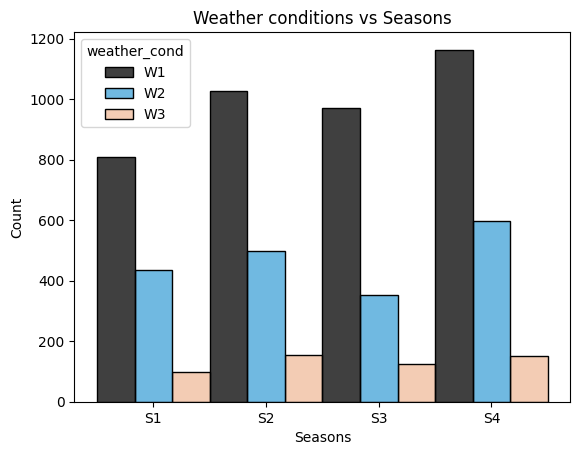

In [ ]:
sns.histplot(data_clip_drop, x='season_var', hue='weather_cond', multiple='dodge'
, palette=sns.color_palette(["#000000", "#40A2D8", "#EFBC9B"], as_cmap=True))
plt.title('Weather conditions vs Seasons')
plt.xlabel('Seasons')
plt.show()

### **f. Draw inferences & conclusions from the analysis and provide recommendations.**

**Test outcome:**  
After performing Chi-Square Test analysis, the hypothesis test rejects the Null Hypothesis (*H$_0$*) and claimed the Alternate Hypothesis (*H$_1$*), proving weather conditions are significantly different during different Seasons.

**Inferences:**  
The weather condition and seasons plays the important key role in determining the demand for bicycles on rent accross different circumstances. Especially, in the winter & summer season and in the weather condition (*Clear, Few clouds, partly cloudy*), the demand for bicycles on rent is huge comparing to other seasons and weather conditions.

**Recommendations:**
- Monitoring the climatic conditional changes (*Weather Conditions & Seasons*) frequently and ensuring or increasing the availability of bicyles for rent increases the revenue.
- Providing seasonal offers at the time of less demand in bicycles may leads to increase the demand in renting the bicycles and increases the revenue as well.
